In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write, read
from IPython.display import Audio 


Item A

In [48]:
fs_original = 8000 
duracao = 5         

print(f"Iniciando a gravação por 5 segundos...")

my_audio = sd.rec(int(duracao * fs_original), samplerate=fs_original, channels=1, dtype='float32')
sd.wait()  

print("Gravação finalizada.")
write('audio_original.wav', fs_original, my_audio)


Iniciando a gravação por 5 segundos...
Gravação finalizada.


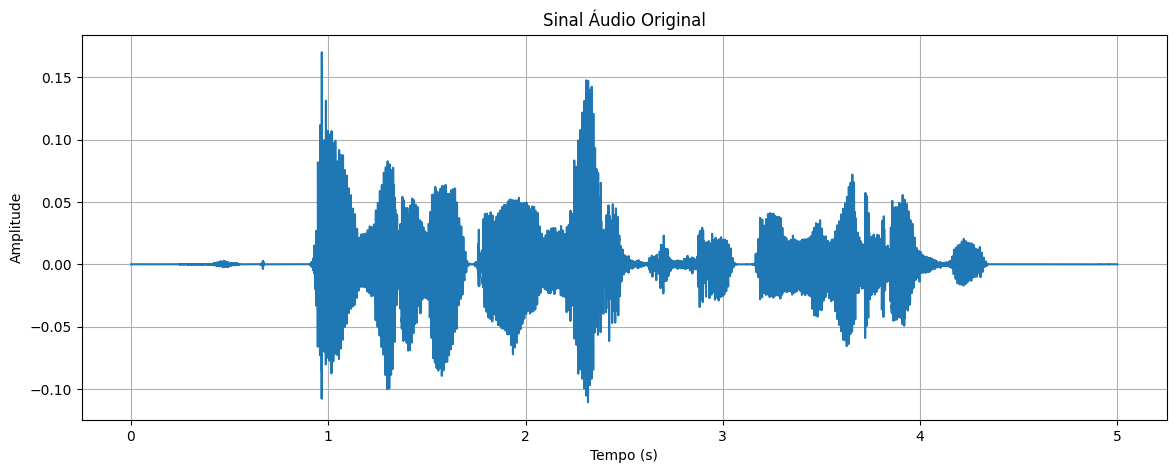

Aúdio gerado: 


In [63]:
t_original = np.linspace(0, duracao, len(my_audio), endpoint=False)

plt.figure(figsize=(14, 5))
plt.plot(t_original, my_audio)
plt.title('Sinal Áudio Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

print("Aúdio gerado: ")
Audio(data=my_audio.flatten(), rate=fs_original)



Item B

In [53]:
print(f"Taxa de amostragem escolhida: {fs_original} Hz")

Taxa de amostragem escolhida: 8000 Hz


- A voz humana possui frequências até 3400 Hz.
- Teorema de Nyquist(2*Fs) = 6800 Hz.
- Escolhemos 8000 Hz pois está acima da frequência de Nyquist e é o padrão da telefonia.
- Logo, se está acima da frequência de Nyquist não temos aliasing.


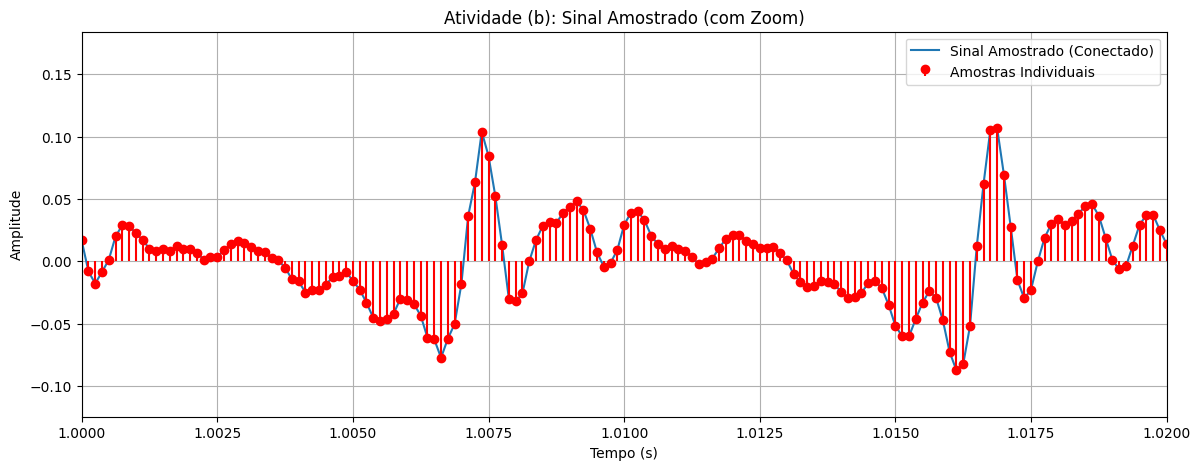

In [60]:
plt.figure(figsize=(14, 5))
plt.plot(t_original, my_audio, label='Sinal Amostrado (Conectado)')
plt.stem(t_original, my_audio, linefmt='r-', markerfmt='ro', basefmt=' ', label='Amostras Individuais')
plt.title('Atividade (b): Sinal Amostrado (com Zoom)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.xlim(1.0, 1.02)
plt.legend()
plt.show()

Item C

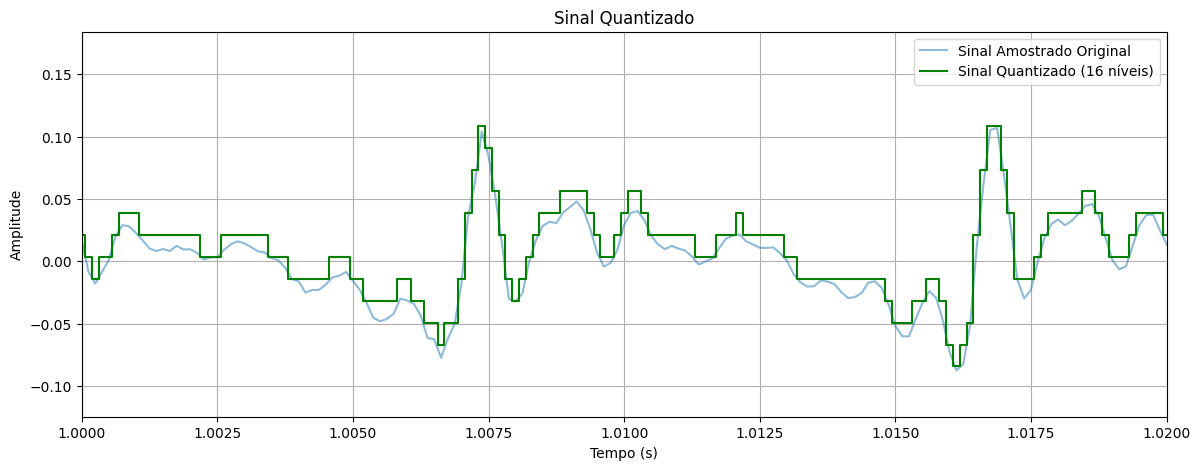

In [97]:
n_bits = 4
M = 2**n_bits

V_min = np.min(my_audio)
V_max = np.max(my_audio)

delta_v = (V_max - V_min) / M

indices = np.round((my_audio - V_min) / delta_v)
indices = np.clip(indices, 0, M - 1)
audio_quantizado = V_min + delta_v/2 + indices * delta_v

plt.figure(figsize=(14, 5))
plt.plot(t_original, my_audio, label='Sinal Amostrado Original', alpha=0.5)
plt.step(t_original, audio_quantizado, where='mid', label=f'Sinal Quantizado ({M} níveis)', color='green')
plt.title('Sinal Quantizado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(1.0, 1.02)

plt.legend()
plt.show()

C:\Users\tales\AppData\Local\Temp\ipykernel_20488\4935683.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  codigo_binario = format(int(indice), f'0{n_bits}b')


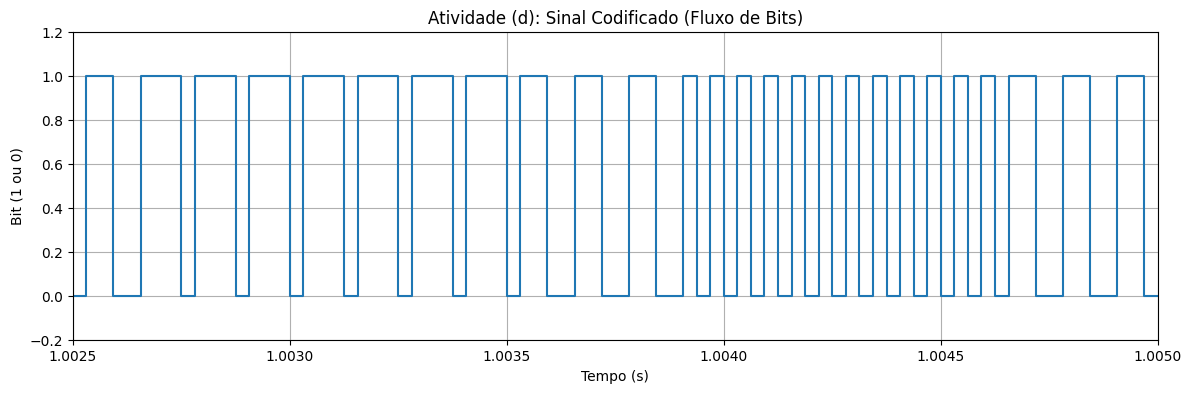

In [98]:
fluxo_de_bits = []
for indice in indices:
    
    codigo_binario = format(int(indice), f'0{n_bits}b')
    
    fluxo_de_bits.extend([int(b) for b in codigo_binario])

sinal_codificado = np.array(fluxo_de_bits)
num_total_de_bits = len(sinal_codificado)
t_codificado = np.linspace(0, duracao, num_total_de_bits, endpoint=False)

plt.figure(figsize=(14, 4))
plt.step(t_codificado, sinal_codificado, where='post') 
plt.title('Atividade (d): Sinal Codificado (Fluxo de Bits)')
plt.xlabel('Tempo (s)')
plt.ylabel('Bit (1 ou 0)')
plt.grid(True)
plt.ylim(-0.2, 1.2)

plt.xlim(1.0025, 1.0050)

plt.show()

In [99]:
audio_quantizado_float = audio_quantizado.astype('float32')
write('audio_quantizado_4bit.wav', fs_original, audio_quantizado_float)

print("Aúdio Original: ")
display(Audio(data=my_audio.flatten(), rate=fs_original))

Aúdio Original: 


In [100]:
print("Aúdio Final: ")
display(Audio(data=audio_quantizado_float.flatten(), rate=fs_original))

Aúdio Final: 


- Podemos visualizar que quanto maior o número de bits utilizados, melhor o aúdio final.
- Isso por conta do erro de quantização que fica menor com mais bits, já que o passo de quantização fica menor.
- No exemplo acima foi utilizado 4 bits e 8 bits para teste